In [1]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import pynocular as pn

In [2]:
# Generate some test data
p = pn.PointData()
p['x'] = np.linspace(0, 1, 100)
p['y'] = np.random.rand(100)
p['a'] = p['x'] ** 2 * p['y']

In [3]:
p

x,0,0.0101,0.0202,0.0303,0.0404,0.0505,...,0.949,0.96,0.97,0.98,0.99,1
y,0.798,0.604,0.089,0.214,0.889,0.987,...,0.09,0.259,0.597,0.564,0.0206,0.932
a,0,6.17e-05,3.63e-05,0.000196,0.00145,0.00252,...,0.0811,0.239,0.562,0.542,0.0202,0.932


In [4]:
p['a']

0,6.17e-05,3.63e-05,0.000196,0.00145,0.00252,...,0.0811,0.239,0.562,0.542,0.0202,0.932


In [5]:
np.array(p['a'])

array([0.00000000e+00, 6.16525421e-05, 3.63165276e-05, 1.96110411e-04,
       1.45162945e-03, 2.51756703e-03, 1.13627734e-03, 4.06328530e-04,
       1.69878678e-03, 1.27405660e-03, 3.73497166e-03, 3.30446444e-03,
       7.64222467e-03, 1.11352647e-02, 1.76931327e-02, 2.06831462e-02,
       2.41498801e-02, 1.91884070e-02, 2.67621624e-02, 3.05749943e-02,
       1.73721553e-02, 2.73840629e-02, 1.13044564e-02, 8.60284167e-03,
       2.90397517e-02, 8.73378080e-03, 5.52430441e-02, 7.29512105e-03,
       3.77275067e-02, 5.14823388e-02, 2.18723462e-02, 5.66412078e-02,
       8.94458328e-02, 9.55131545e-02, 1.01282146e-01, 1.16429044e-01,
       1.00950587e-01, 5.48273625e-02, 6.24826511e-02, 1.35286694e-01,
       1.50898641e-02, 7.74247466e-02, 4.54102856e-02, 1.06853333e-01,
       1.95091322e-01, 3.83931308e-02, 6.77450133e-02, 4.66809299e-02,
       1.55934961e-01, 4.75470141e-02, 4.23466612e-02, 7.49918163e-02,
       2.38295028e-01, 1.15842326e-01, 2.68063246e-01, 2.15609196e-01,
      

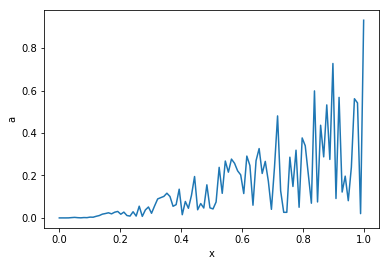

In [6]:
# let's make a simple plot
p.plot('x', 'a')

In [7]:
# different pointdata
p2 = pn.PointData(x=np.random.rand(100))

In [8]:
p2

x,0.149,0.696,0.665,0.7,0.647,0.56,...,0.429,0.0333,0.265,0.956,0.663,0.625


In [9]:
p2 = p.interp(p2)

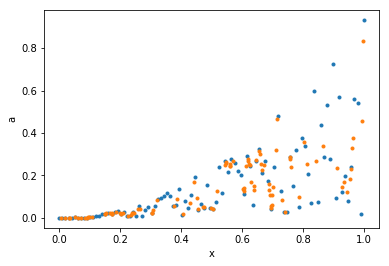

In [10]:
p.plot('x', 'a', '.')
p.interp(p2[['x']], method='linear').plot('x', 'a', '.')

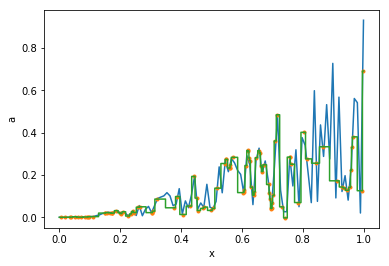

In [11]:
p.plot('x', 'a')
p2.plot('x', 'a', '.')
p2.interp(x=np.linspace(0,1,1000), method='nearest').plot('a')

In [15]:
p.interp(p2)

x,0.149,0.696,0.665,0.7,0.647,0.56,...,0.429,0.0333,0.265,0.956,0.663,0.625
y,0.9,0.0845,0.489,0.138,0.673,0.738,...,0.289,0.403,0.721,0.155,0.555,0.686
a,0.0197,0.041,0.216,0.0674,0.282,0.233,...,0.0532,0.000463,0.0497,0.142,0.243,0.268


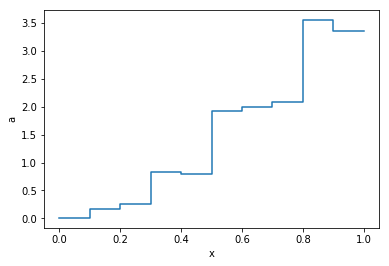

In [18]:
# Generate a histogram function for histograms with weight 'a'
g = p.histogram('x')
g.plot('a')
#g.plot('counts')

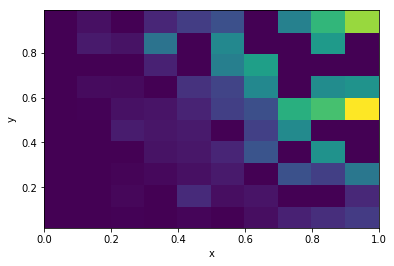

In [19]:
gn = p.histogram('x', 'y')
gn.plot('a')

In [20]:
gn['a']

y \ x,[0. 0.1],[0.1 0.2],[0.2 0.3],[0.3 0.4],[0.4 0.5],[0.5 0.6],[0.6 0.7],[0.7 0.8],[0.8 0.9],[0.9 1. ]
[0.021 0.117],0.000443,0,0.0073,0,0.0151,0,0.0405,0.103,0.145,0.193
[0.117 0.214],0.00147,0,0.0173,0,0.133,0.0423,0.0599,0,0,0.122
[0.214 0.311],0.00284,0.0033,0.0113,0.0219,0.0454,0.075,0,0.276,0.205,0.436
[0.311 0.407],0,0.00373,0,0.0548,0.0677,0.116,0.288,0,0.563,0
[0.407 0.504],0,0,0.0841,0.0625,0.0774,0,0.21,0.526,0,0
[0.504 0.601],0,0.00764,0.0515,0.0566,0.107,0.203,0.266,0.696,0.777,1.1
[0.601 0.698],6.17e-05,0.0303,0.0274,0,0.156,0.222,0.517,0,0.533,0.568
[0.698 0.794],0,0,0,0.101,0,0.473,0.618,0,0,0
[0.794 0.891],0.00145,0.075,0.0552,0.422,0,0.516,0,0,0.599,0
[0.891 0.988],0.00252,0.0448,0,0.116,0.195,0.268,0,0.481,0.728,0.932


In [21]:
np.sum(gn['a'], axis='y')

x,[0. 0.1],[0.1 0.2],[0.2 0.3],[0.3 0.4],[0.4 0.5],[0.5 0.6],[0.6 0.7],[0.7 0.8],[0.8 0.9],[0.9 1. ]
,0.00878,0.165,0.254,0.835,0.796,1.91,2,2.08,3.55,3.35


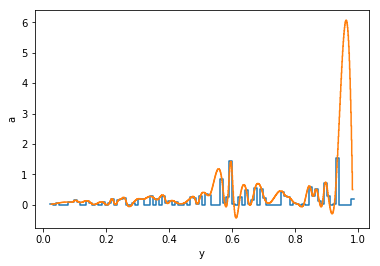

In [22]:
p.histogram(y=100).plot('a')
p.binwise(y=100, function=np.sum, fill_value=np.nan).interp(y=1000, method='cubic').plot('a')

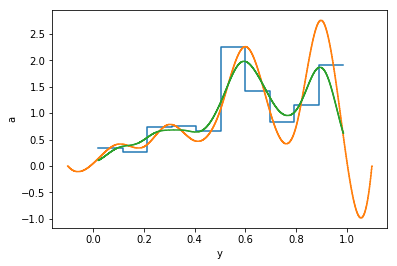

In [23]:
p.histogram('y', density=True).plot('a')
p.histogram(y=np.linspace(-0.1,1.1,13), density=True).interp(y=1000).plot('a')
p.kde(y=1000, density=True, bw=0.05).plot('a')

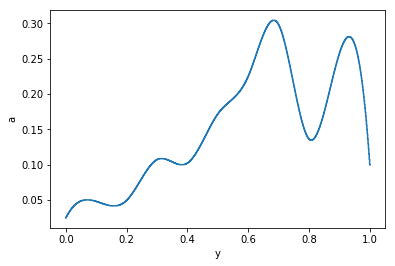

In [24]:
p.binwise(y=np.linspace(-0.1,1.1,13), function=np.mean).interp(y=1000, method='cubic').plot('a')

In [25]:
g = p.histogram(x=10)

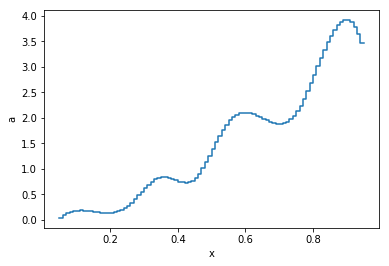

In [26]:
g.interp(x=100).plot('a')

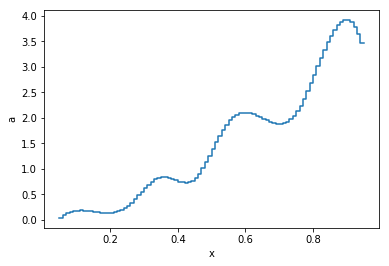

In [27]:
g.interp(x=100).plot('a')

In [28]:
p.histogram(x=10).grid

Grid(
Axis("x",
points = None,
edges = edges: array([[0. , 0.1],
       [0.1, 0.2],
       [0.2, 0.3],
       [0.3, 0.4],
       [0.4, 0.5],
       [0.5, 0.6],
       [0.6, 0.7],
       [0.7, 0.8],
       [0.8, 0.9],
       [0.9, 1. ]]))
nbins = 10),)

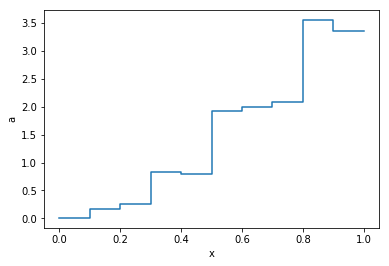

In [29]:
# or in one line
p.histogram('x').plot('a')

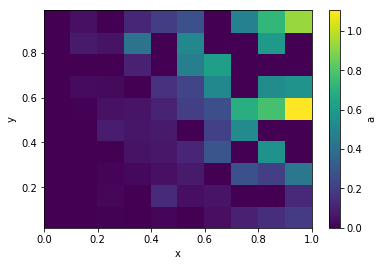

In [30]:
# we can also evaluate the histogram in different dimensions
p.histogram('x', 'y').plot('a', cbar=True)

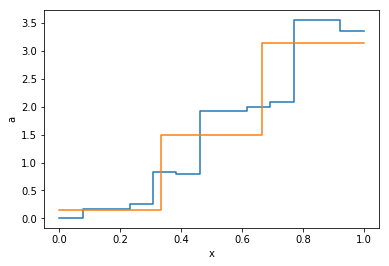

In [31]:


# we can also evaluate the histogram in different dimensions
g = p.histogram('x')
p.histogram('x').resample(x=13).plot('a')
p.histogram('x').resample(x=3).plot('a')


In [32]:
g['a']

x,[0. 0.1],[0.1 0.2],[0.2 0.3],[0.3 0.4],[0.4 0.5],[0.5 0.6],[0.6 0.7],[0.7 0.8],[0.8 0.9],[0.9 1. ]
,0.00878,0.165,0.254,0.835,0.796,1.91,2,2.08,3.55,3.35


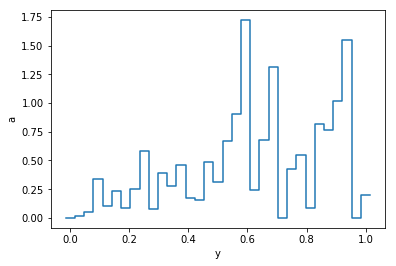

In [33]:
p.histogram(y=np.linspace(0,1,33)).plot('a')

In [34]:
# the returned object is a GridData type
g = p.histogram(x=20)

In [35]:
# it has a grid defined
g

x,[0. 0.05],[0.05 0.1 ],[0.1 0.15],[0.15 0.2 ],[0.2 0.25],[0.25 0.3 ],...,[0.7 0.75],[0.75 0.8 ],[0.8 0.85],[0.85 0.9 ],[0.9 0.95],[0.95 1. ]
y,2.59,1.79,2.68,4.12,1.92,2.11,...,1.75,1.95,1.88,2.91,1.24,2.37
a,0.00175,0.00703,0.0435,0.121,0.0937,0.16,...,0.901,1.18,1.29,2.26,1.06,2.29
counts,5,5,5,5,5,5,...,5,5,5,5,5,5


In [36]:
1//2

0